In [ ]:
# dataset https://www.kaggle.com/datasets/mahmoudima/mma-facial-expression
# tensorflow 2.x version 선택
%tensorflow_version 2.x

# **1. 데이터 업로드**

In [2]:
from google.colab import files 

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving dataset_3000.zip to dataset_3000.zip
User uploaded file "dataset_3000.zip" with length 4468440 bytes


In [3]:
# Google Drive와 연결하기
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! mkdir dataset_3000                           # 마운트에 폴더 생성
! unzip dataset_3000.zip -d ./dataset_3000     # 업로드한 데이터를 dataset_3000 폴더에 unzip 

# **2. train과 validation을 위한 이미지 불러오기 및 data augmentation**

0
3


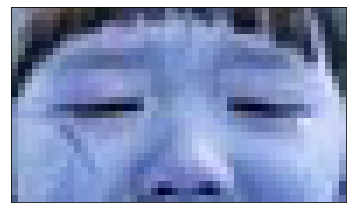

1
3


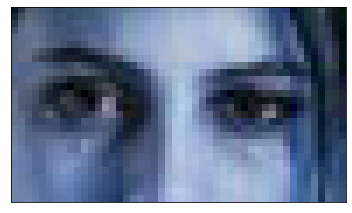

2
1


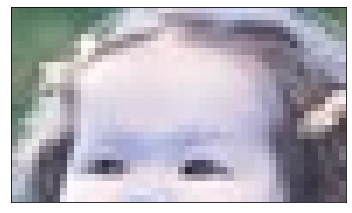

3
3


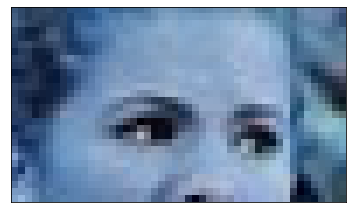

4
5


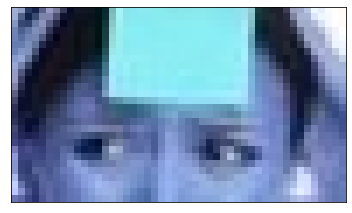

5
3


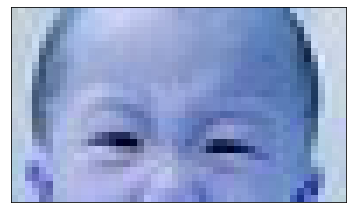

6
2


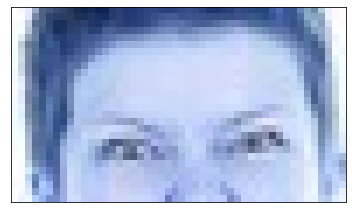

7
3


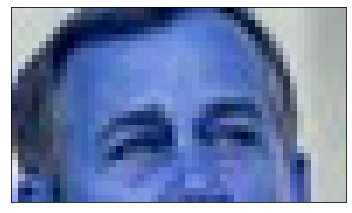

8
1


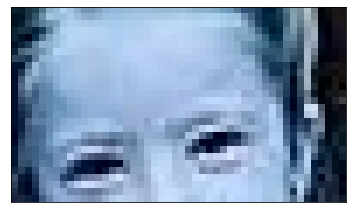

9
1


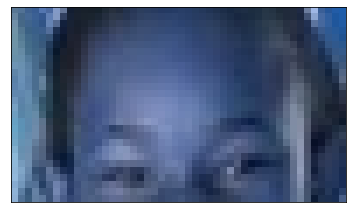

0
3


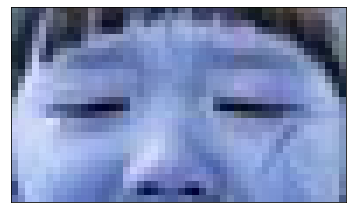

1
3


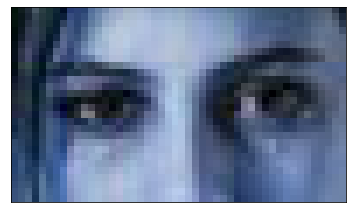

2
1


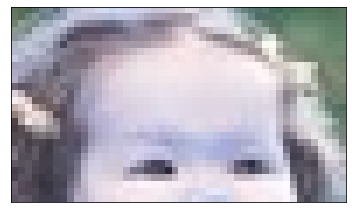

3
3


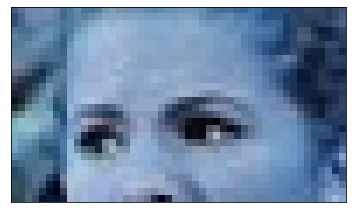

4
5


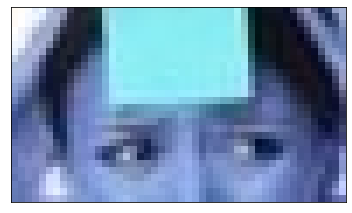

5
3


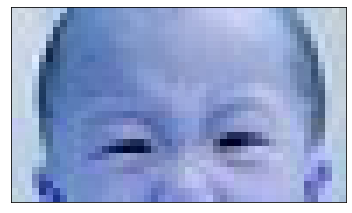

6
2


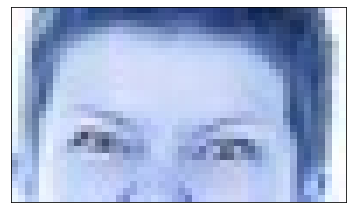

7
3


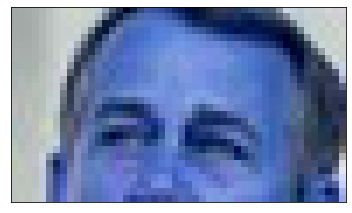

8
1


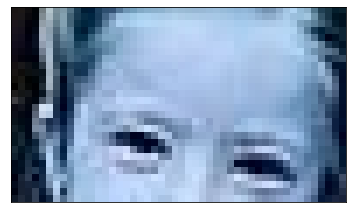

9
1


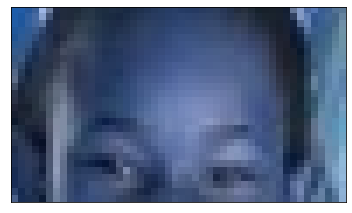

0
3


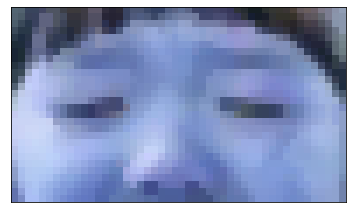

1
3


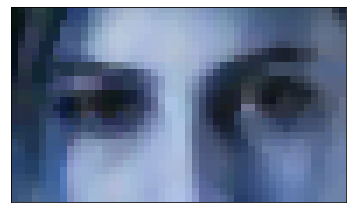

2
1


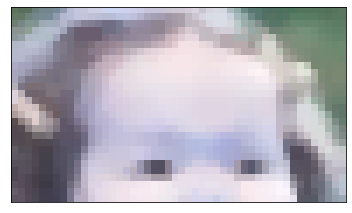

3
3


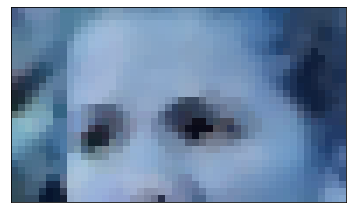

4
5


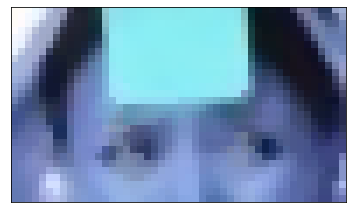

5
3


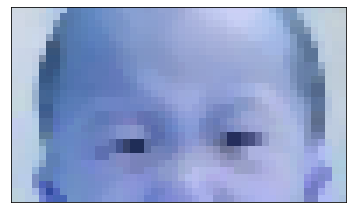

6
2


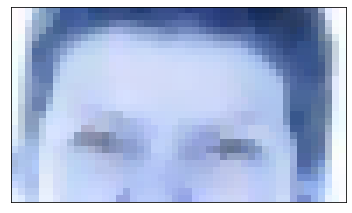

7
3


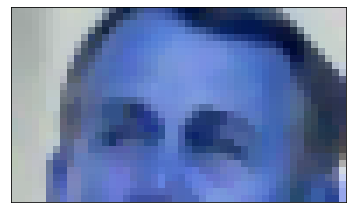

8
1


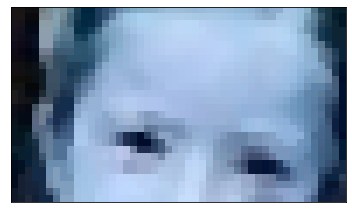

9
1


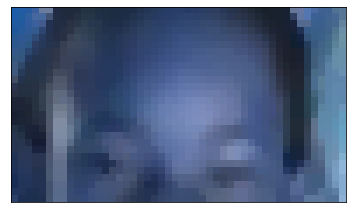

10
3


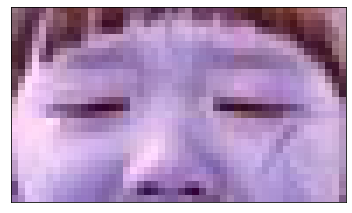

10
3


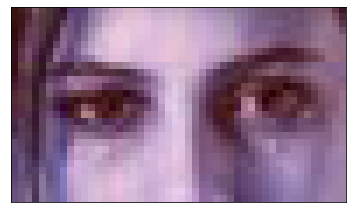

10
1


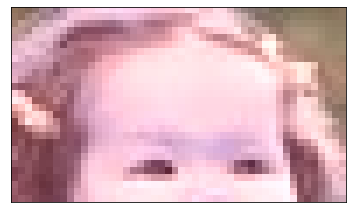

10
3


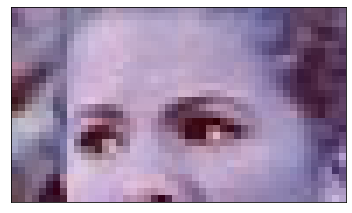

10
5


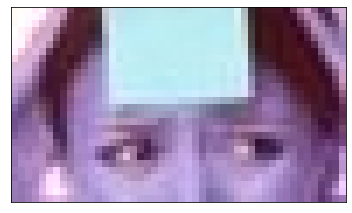

10
3


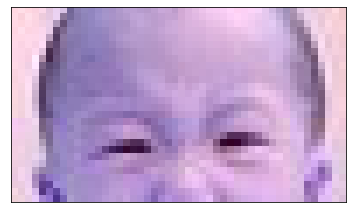

10
2


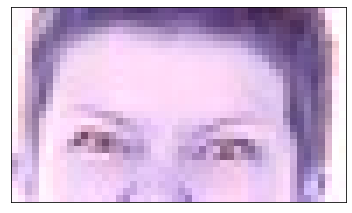

10
3


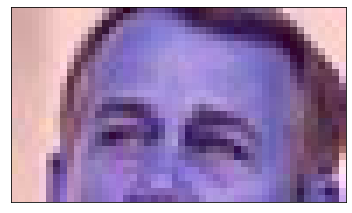

10
1


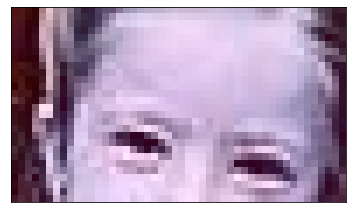

10
1


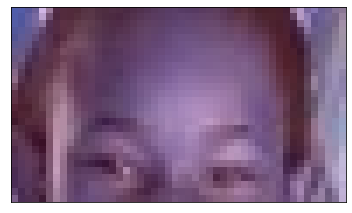

X_shape: (28, 48, 3) Y_shape: ()
X_list shape: (8000, 28, 48, 3) Y_list shape: (8000,)


In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 

# train과 valid data만 augmentation을 해주기 위해 train 폴더 이미지만 불러오기
src = '/content/dataset_3000/train/'

# 이미지 읽기 및 출력
def img_read_plot(src,file):   
    
    img = cv.imread(src+file,cv.IMREAD_COLOR) # 컬러로 읽어들이기
    plt.imshow(img)
    plt.xticks([]) # x축 눈금
    plt.yticks([]) # y축 눈금
    plt.show()
    return img

# 이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file)  
    return img

# 좌우반전 후 읽기 및 출력
def img_leftright_plot(src,file):  
    origin = cv.imread(src+file,cv.IMREAD_COLOR) # 컬러로 읽어들이기
    img = cv.flip(origin,1) # 좌우반전 시켜주기
    plt.imshow(img)
    plt.xticks([]) # x축 눈금
    plt.yticks([]) # y축 눈금
    plt.show()
    return img

# 좌우반전 후 읽기
def img_leftright(src,file):
    origin = cv.imread(src+file)
    img = cv.flip(origin,1) # 좌우반전 시켜주기
    return img

# 블러처리 후 읽기 및 출력
def img_blur_plot(src,file):   
    origin = cv.imread(src+file,cv.IMREAD_COLOR) # 컬러로 읽어들이기
    img = cv.medianBlur(origin,3) # 블러처리 해주기, 3: 흐림 정도
    plt.imshow(img)
    plt.xticks([]) # x축 눈금
    plt.yticks([]) # y축 눈금
    plt.show()
    return img

# 블러처리 후 읽기
def img_blur(src,file):
    origin = cv.imread(src+file)
    img = cv.medianBlur(origin,3) # 블러처리 해주기, 3: 흐림 정도
    return img

# 밝기 조정 후 읽기 및 출력
def img_bright_plot(src,file):
    origin = cv.imread(src+file,cv.IMREAD_COLOR)
    img = cv.add(origin, 50) # RGB 중 Red 밝기 높여주기, 50: 밝기 정도
    plt.imshow(img)
    plt.xticks([]) # x축 눈금
    plt.yticks([]) # y축 눈금
    plt.show()
    return img

# 밝기 조정 후 읽기
def img_bright(src,file):
    origin = cv.imread(src+file)
    img = cv.add(origin,50) # RGB 중 Red 밝기 높여주기, 50: 밝기 정도
    return img

# src 경로에 있는 파일명을 저장
files = os.listdir(src)

# 대문자 X, Y는 각각 train과 valid data의 image와 label
X,Y = [],[]
count1 = 0
count2 = 0
count3 = 0
count4 = 0

# 경로와 파일명을 입력으로 넣어 "좌우반전" 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
  # 데이터 10개만 확인
  if count1 < 10: 
    print(count1)
    print(file[-5:-4])
    X.append(img_leftright_plot(src,file)/255.) # 이미지를 리스트에 저장
    Y.append(int(file[-5:-4])%5) # 이미지의 라벨을 리스트에 저장, one-hot encoding을 위해 label을 1,2,3,4,5 -> 1,2,3,4,0으로 변경
    count1 +=1
  else : 
    X.append(img_leftright(src,file)/255.)
    Y.append(int(file[-5:-4])%5)

# 경로와 파일명을 입력으로 넣어 이미지 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
  # 데이터 10개만 확인
  if count2 < 10: 
    print(count2)
    print(file[-5:-4])
    X.append(img_read_plot(src,file)/255.)
    Y.append(int(file[-5:-4])%5)
    count2 +=1
  else : 
    X.append(img_read(src,file)/255.)
    Y.append(int(file[-5:-4])%5)

# 경로와 파일명을 입력으로 넣어 "블러처리" 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
  # 데이터 10개만 확인
  if count3 < 10: 
    print(count3)
    print(file[-5:-4])
    X.append(img_blur_plot(src,file)/255.)
    Y.append(int(file[-5:-4])%5)
    count3 +=1
  else : 
    X.append(img_blur(src,file)/255.)
    Y.append(int(file[-5:-4])%5)

# 경로와 파일명을 입력으로 넣어 "밝기변화" 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
  # 데이터 10개만 확인
  if count4 < 10: 
    print(count3)
    print(file[-5:-4])
    X.append(img_bright_plot(src,file)/255.)
    Y.append(int(file[-5:-4])%5)
    count4 +=1
  else : 
    X.append(img_bright(src,file)/255.)
    Y.append(int(file[-5:-4])%5)


# 리스트를 array로 변환
X = np.array(X)
Y = np.array(Y)

# array로 잘 변화되었는지 data 수와 data 크기 확인(총 8000개, size = 28*48*3)
print('X_shape:',np.shape(X[0]),'Y_shape:',np.shape(Y[0]))
print('X_list shape:',np.shape(X),'Y_list shape:',np.shape(Y))

# **3. test를 위한 이미지 불러오기**

0
5


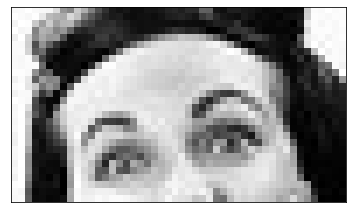

1
3


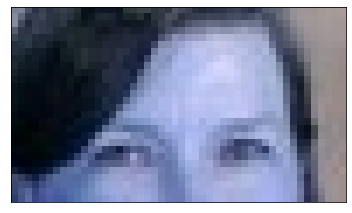

2
5


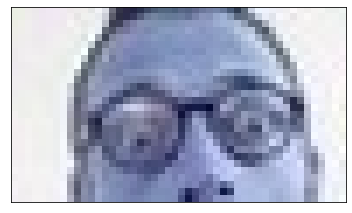

3
2


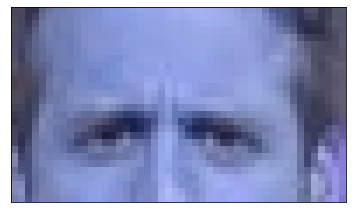

4
5


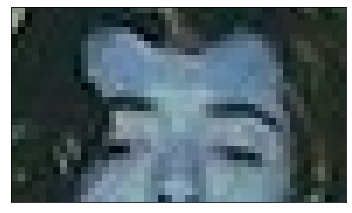

5
2


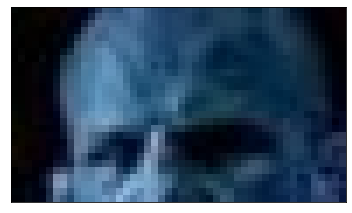

6
4


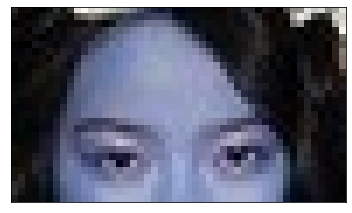

7
1


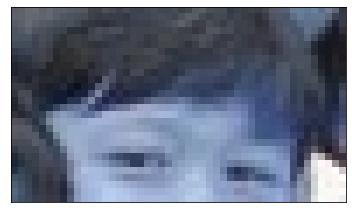

8
1


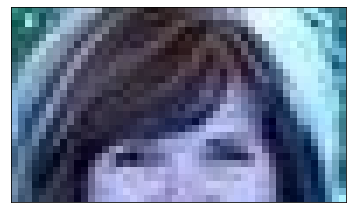

9
1


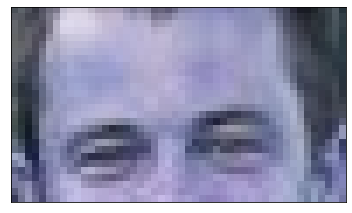

x_shape: (28, 48, 3) Y_shape: ()
x_list shape: (1000, 28, 48, 3) Y_list shape: (1000,)


In [6]:
# test 데이터 불러오기 위해 경로 저장
src = '/content/dataset_3000/test/'

# src 경로에 있는 파일명을 저장
files2 = os.listdir(src)

# 소문자 x, y는 각각 test data의 image와 label
x,y = [],[]
count = 0

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 

for file in files2: 
  # 데이터 10개만 확인
  if count < 10: 
    print(count)
    print(file[-5:-4])
    x.append(img_read_plot(src,file)/255.)
    y.append(int(file[-5:-4])%5)
    count +=1
  else : 
    x.append(img_read(src,file)/255.)
    y.append(int(file[-5:-4])%5)

# 리스트를 array로 변환
x = np.array(x)
y = np.array(y)

# array로 잘 변화되었는지 data 수와 data 크기 확인(총 1000개, size = 28*48*3)
print('x_shape:',np.shape(x[0]),'Y_shape:',np.shape(y[0]))
print('x_list shape:',np.shape(x),'Y_list shape:',np.shape(y))

# **4. Importing Libraries**

In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # one-hot 인코딩


print(tf.__version__)     # 텐서플로우 버전확인(2.x 버전 사용)
print(keras.__version__)

2.5.0
2.5.0


# **5. Data split and one-hot encoding**

In [8]:
import sklearn
from sklearn.model_selection import train_test_split

# Train set(90%), Valid set(10%)으로 나누기 
img_train, img_val, label_train, label_val = train_test_split(X,Y, test_size=0.1, random_state=1,shuffle=True) # train : valid = 7200 : 800
img_test , label_test = (x,y) # train : valid : test = 7200 : 800 : 1000

# label을 one-hot encoding    
label_train = to_categorical(label_train, 5) # 5: 분류하는 class 수 = label 수
label_val = to_categorical(label_val, 5) 
label_test = to_categorical(label_test, 5) 

# 행렬의 차원을 출력하여 data split과 one-hot encoding이 잘 되었는지 확인
print(np.shape(img_train),np.shape(img_val),np.shape(img_test))
print(np.shape(label_train),np.shape(label_val),np.shape(label_test))

(7200, 28, 48, 3) (800, 28, 48, 3) (1000, 28, 48, 3)
(7200, 5) (800, 5) (1000, 5)


In [9]:
print(np.array(label_train),np.array(label_val),np.array(label_test)) # one-hot encoding이 잘되었는지 확인

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]] [[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]] [[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


# **6. Model Function**

In [10]:
# Sequential 모델 층 구성
def create_model():
    model = keras.Sequential() 
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(28, 48, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(5, activation=tf.nn.softmax)) # 5가지 표정을 분류하는 multi-class classification 이므로 last-layer activation으로 softmax 사용
    return model

In [11]:
model = create_model() # create_model 함수를 model로 저장
model.summary() # 모델에 대한 요약 출력

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 12, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 12, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 12, 128)        7

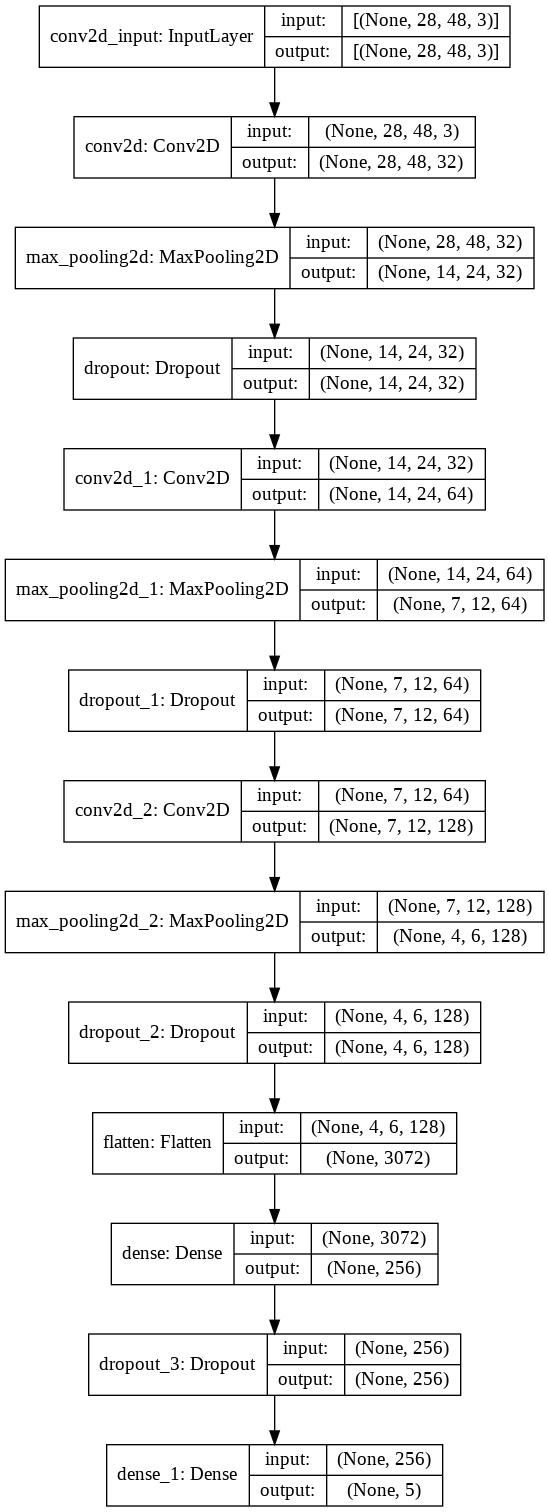

In [12]:
# 위에서 정한 모델을 그림으로(plot) 보여줌
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) 

# **7. Hyper parameters**

In [13]:
learning_rate = 0.001  # 러닝레이트 
training_epochs = 300  # 에폭
batch_size = 64        # 배치사이즈

# **8. Data training**

In [14]:
#과적합 방지 (callback(ModelCheckpoint+EarlyStopping)함수 추가)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filename = 'best-model.h5'
checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                             )
earlystopping  = EarlyStopping(monitor='val_loss',patience=30, verbose=1)

In [15]:
# CNN 모델 구조 확정하고 컴파일 진행
model.compile(loss='categorical_crossentropy',       # crossentropy loss
              optimizer='adam',                      # adam optimizer    
              metrics=['accuracy'])                  # 측정값 : accuracy

# 학습실행
history = model.fit(img_train, label_train,           # 입력값
          batch_size=batch_size,                      # 1회마다 배치마다 64개 프로세스 
          epochs=training_epochs,                     # 최대 300회 학습
          verbose=1,                                  # verbose는 학습 중 출력되는 문구를 설정하는 것 
          validation_data=(img_val,label_val),         
          callbacks = [checkpoint, earlystopping])    # val_loss가 더이상 개선되지 않으면 설정한 에폭 전에 학습종료

# valid 값 결과 확인
score = model.evaluate(img_val, label_val, verbose=0) # verbose가 0 이면 ==== 움직이지 않고, 1이면 ==== 진행 바가 움직임
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

# test 값 결과 확인
score2 = model.evaluate(img_test, label_test, verbose=0) # verbose가 0 이면 ==== 움직이지 않고, 1이면 ==== 진행 바가 움직임
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/300
113/113 [==============================] - 31s 10ms/step - loss: 1.6121 - accuracy: 0.2064 - val_loss: 1.6004 - val_accuracy: 0.2725

Epoch 00001: val_loss improved from inf to 1.60044, saving model to best-model.h5
Epoch 2/300
113/113 [==============================] - 1s 8ms/step - loss: 1.5953 - accuracy: 0.2426 - val_loss: 1.5843 - val_accuracy: 0.3038

Epoch 00002: val_loss improved from 1.60044 to 1.58427, saving model to best-model.h5
Epoch 3/300
113/113 [==============================] - 1s 8ms/step - loss: 1.5679 - accuracy: 0.2924 - val_loss: 1.5403 - val_accuracy: 0.3212

Epoch 00003: val_loss improved from 1.58427 to 1.54033, saving model to best-model.h5
Epoch 4/300
113/113 [==============================] - 1s 8ms/step - loss: 1.5218 - accuracy: 0.3392 - val_loss: 1.4859 - val_accuracy: 0.3775

Epoch 00004: val_loss improved from 1.54033 to 1.48594, saving model to best-model.h5
Epoch 5/300
113/113 [==============================] - 1s 8ms/step - loss: 1.4775 

# **9. Visualization**

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os

# 모델 학습 후 정보가 담긴 history 내용을 토대로 선 그래프를 그리는 함수 설정

# Accuracy(정확도) Visualization 함수 정의
def plot_acc(history, title=None):        
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])        # train accuracy 
    plt.plot(history['val_accuracy'])    # validation accuracy
    if title is not None:
        plt.title(title)  
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0) # 그래프 범례, loc = 0은 loc = 'best': 범례 위치  
    plt.show()

# Loss Visualization 함수 정의
def plot_loss(history, title=None):     
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])           # train loss
    plt.plot(history['val_loss'])       # validation loss
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    plt.show()

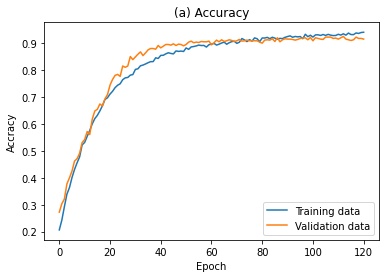

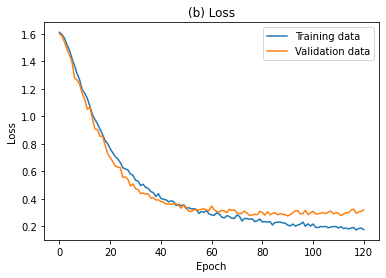

In [17]:
# 그래프로 나타내기
plot_acc(history, '(a) Accuracy')  # 학습 경과에 따른 accuracy(정확도) 변화 추이
plot_loss(history, '(b) Loss')     # 학습 경과에 따른 loss(손실값) 변화 추이

# **10. Confusion matrix**

AxesSubplot(0.125,0.125;0.775x0.755)


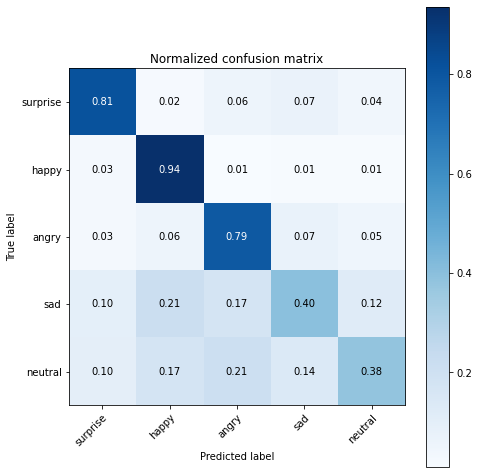

In [18]:
# Confusion matrix 시각화
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Making prediction
y_pred = np.argmax(model.predict(x), axis=-1)
y_true = np.argmax(label_test,axis=1)

# confusion matrix plot 함수 정의
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    # confusion matrix 계산
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(7,7)) # fig: figure 객체이고 figure size를 (7,7)로 설정, ax:  
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    print(ax)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",     # x축 label 45도 회전
             rotation_mode="anchor")
    # confusion matrix 내에 텍스트 주석 삽입
    fmt = '.2f' if normalize else 'd'   # normalization해줄 경우 소수점 아래 둘째자리까지 나타내고 그렇지 않으면 십진수로 나타냄
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# numpy float 출력 옵션 변경 (소수점 아래 둘째자리 까지 출력)
np.set_printoptions(precision=2)



# class labels 정의
class_names=['surprise', 'happy', 'angry', 'sad', 'neutral']

# normalized confusion matrix 그리기
plot_confusion_matrix(y_true, y_pred, classes = class_names, normalize = True, title = 'Normalized confusion matrix')



In [19]:
# precision(정밀도) recall(재현도) f1-score(precision과 recall의 조화평균) support(각 클래스별 요소 갯수)
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    surprise       0.77      0.81      0.79       200
       happy       0.67      0.94      0.78       200
       angry       0.64      0.79      0.71       200
         sad       0.57      0.40      0.47       200
     neutral       0.63      0.38      0.47       200

    accuracy                           0.66      1000
   macro avg       0.65      0.66      0.64      1000
weighted avg       0.65      0.66      0.64      1000

